In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import the necessary pacakges

In [271]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV ,ShuffleSplit,RandomizedSearchCV
import xgboost as xgb
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load train and test dataset

In [ ]:
train=pd.read_csv("/content/gdrive/MyDrive/Data Sprint #37: Medical Insurance Cost/Train_Data.csv")
test=pd.read_csv("/content/gdrive/MyDrive/Data Sprint #37: Medical Insurance Cost/Test_Data.csv")

#### let's see the basic information about train and test dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


#### The above informations shows there are 3630 data entries and 5 feature variables and 1 target variable in train dataset.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       492 non-null    float64
 1   sex       492 non-null    object 
 2   bmi       492 non-null    float64
 3   smoker    492 non-null    object 
 4   region    492 non-null    object 
 5   children  492 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.2+ KB


#### The above summary shows that there are 492 data entries and 5 feature variable in test dataset.

#### Let's see is there missing values in both train and test dataset.

In [ ]:
train.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [ ]:
test.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
dtype: int64

#### The above summary shows that there are no missing values in both train and test dataset.

#### Let's see the glimpse of train and test dataset.

In [ ]:
train.head(2)

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239


In [ ]:
test.head(2)

,age,sex,bmi,smoker,region,children
0,40.0,male,29.9,no,southwest,2
1,47.0,male,32.3,no,southwest,1


#### Let's see the categorical column level counts in both train and test dataset.

In [ ]:
for i in train.select_dtypes(include='object').columns:
  print(train[i].value_counts())


male      2029
female    1601
Name: sex, dtype: int64
no     3070
yes     560
Name: smoker, dtype: int64
southeast    1021
northwest     911
southwest     850
northeast     848
Name: region, dtype: int64


In [ ]:
for i in test.select_dtypes(include='object').columns:
  print(test[i].value_counts())


male      286
female    206
Name: sex, dtype: int64
no     430
yes     62
Name: smoker, dtype: int64
northeast    146
southeast    135
southwest    106
northwest    105
Name: region, dtype: int64


#### Let's perform exploratory data analysis

#### Let's see the target column(charges) distribution.

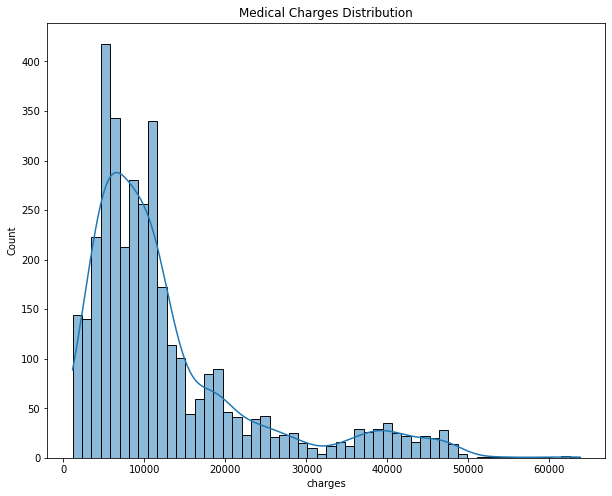

In [ ]:
plt.figure(figsize=(10,8))
_=sns.histplot(train['charges'], kde=True)
_=plt.title("Medical Charges Distribution")

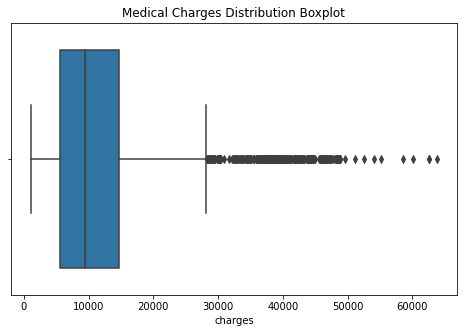

In [ ]:
plt.figure(figsize=(8,5))
_=sns.boxplot(train['charges'])
_=plt.title("Medical Charges Distribution Boxplot")

In [ ]:
train['charges'].describe()

count     3630.000000
mean     12784.808644
std      10746.166743
min       1121.873900
25%       5654.818262
50%       9443.807222
75%      14680.407505
max      63770.428010
Name: charges, dtype: float64

#### The above histogram and boxplot shows that the medical cost distribution is right skewed and boxplot explains that there are outlier's above the third quartile.

#### The average medical cost of an individual is 12784

#### Let's see age column distribution

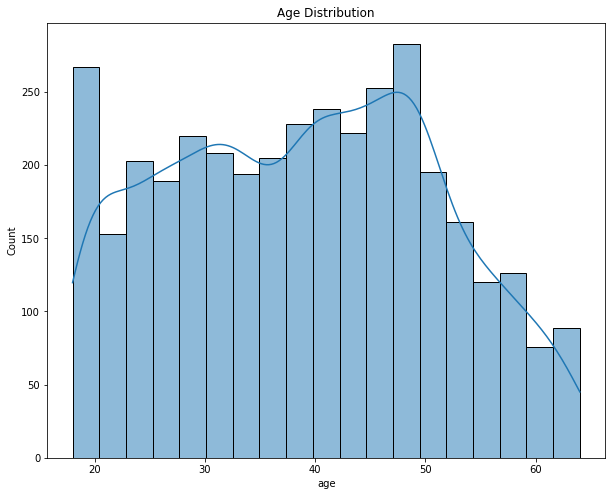

In [ ]:
plt.figure(figsize=(10,8))
_=sns.histplot(train['age'], kde=True)
_=plt.title("Age Distribution")

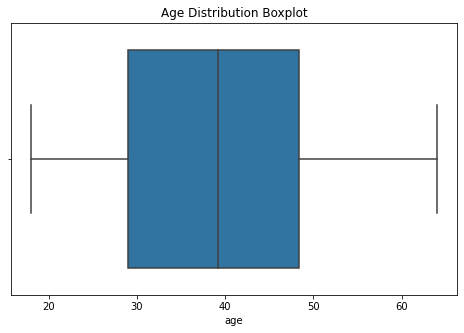

In [ ]:
plt.figure(figsize=(8,5))
_=sns.boxplot(train['age'])
_=plt.title("Age Distribution Boxplot")

#### The above histogram and boxplot explains that age column is normally distributed.

#### Gender-wise medical charges distribution

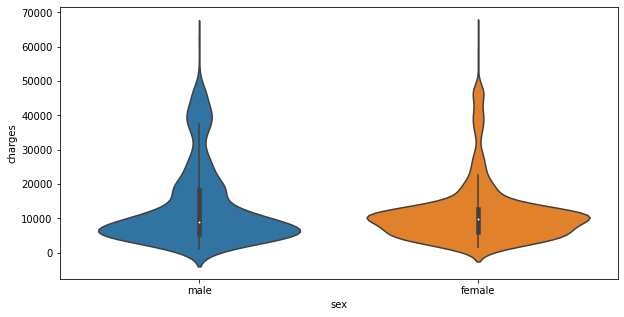

In [ ]:
_=plt.figure(figsize=(10,5))
_=sns.violinplot(train['sex'],train['charges'])

In [ ]:
train.groupby('sex')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,1601.0,11663.481779,9154.476211,1615.7667,5972.378000,9916.595977,12680.191480,63770.42801
male,2029.0,13669.601305,11779.296673,1121.8739,5514.509893,8953.504400,18303.140256,62592.87309


#### The above violin plot explains that the average medical charges for male insurance holders are high compared to females.

### Let's see bmi column distribution

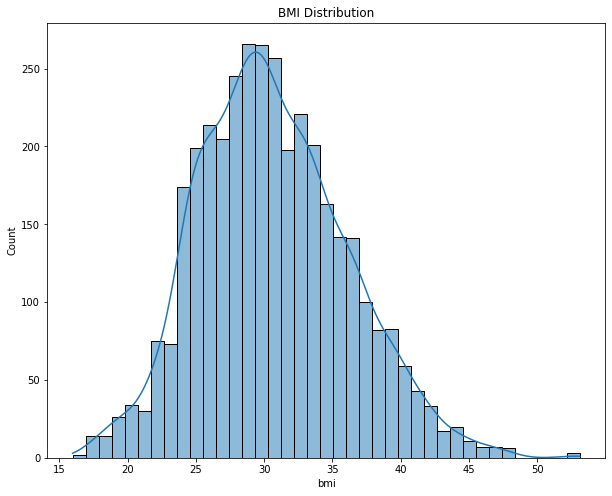

In [ ]:
plt.figure(figsize=(10,8))
_=sns.histplot(train['bmi'], kde=True)
_=plt.title("BMI Distribution")

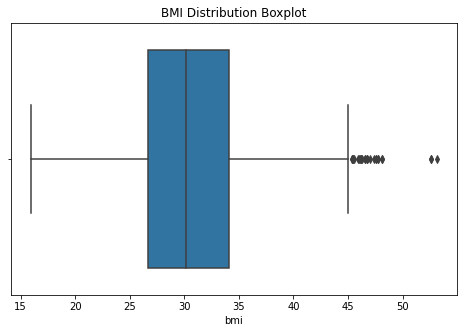

In [ ]:
plt.figure(figsize=(8,5))
_=sns.boxplot(train['bmi'])
_=plt.title("BMI Distribution Boxplot")

#### The above histogram and boxplot explains that the bmi distribtion is normal and there are outliers above the third quartile.

#### Let's see is there any difference in medical charges of customers who are having smoking habit and not having.

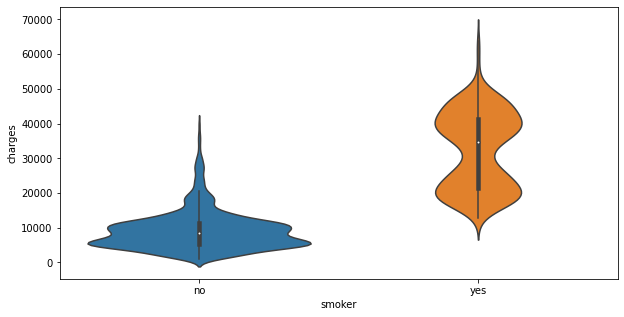

In [ ]:
_=plt.figure(figsize=(10,5))
_=sns.violinplot(train['smoker'],train['charges'])

In [ ]:
train.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,3070.0,9218.346820,5635.747702,1121.8739,5246.534327,8489.404511,11346.482104,40160.789435
yes,560.0,32336.661853,11067.969069,12829.4551,21326.373987,34644.993925,41332.530424,63770.428010


#### The above violin plot explains that the average medical cost of customers with smoking habits is highest than the non-smoking customer's medical charges.

#### Let's see are there any changes in region-wise medical charges.

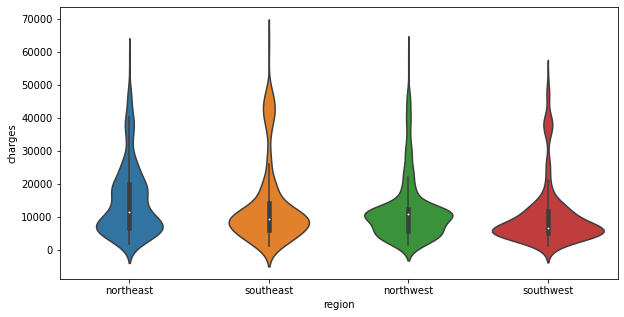

In [ ]:
_=plt.figure(figsize=(10,5))
_=sns.violinplot(train['region'],train['charges'])

In [ ]:
train.groupby('region')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,848.0,14971.019505,10816.756476,1694.7964,6723.553524,11615.296973,20099.735453,58571.07448
northwest,911.0,11985.709166,9344.957949,1621.3402,5827.362306,10788.741499,12491.682753,60021.39897
southeast,1021.0,13655.955548,12203.307730,1121.8739,6123.998544,9360.924005,14249.395265,63770.42801
southwest,850.0,10413.787260,9610.831096,1241.5650,5020.277438,6722.514131,11666.393368,52590.82939


#### The above violin plot explains that the average medical cost of individuals is higher in the regions northeast and southeast compared to other regions.

#### Let's see, will an individual's medical cost depend on their family members' count?

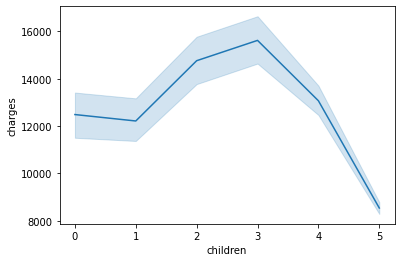

In [ ]:
_=sns.lineplot(train['children'],train['charges'])

#### The above line plot explains that the number of children decides the medical cost of a customer.

#### Let's see is there any correlation between independent variables.

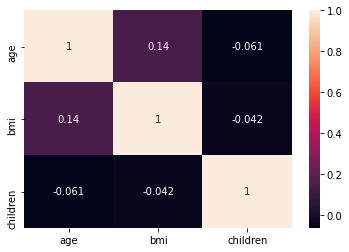

In [ ]:
_=sns.heatmap(train[['age','bmi','children']].corr(),annot=True)

#### The above heatmap explians that age and bmi are positively correlated.

#### age and children ,bmi and children are negatively correlated.

#### Let's perform some feature engineering task.

#### Encode gender column levels as 0 and 1

In [ ]:
gender={'male':1,'female':0}
train['sex']=train['sex'].map(gender).astype('int')

#### Encode smoker column levels as 0 and 1

In [ ]:
smoke={'no':0,'yes':1}
train['smoker']=train['smoker'].map(smoke).astype('int')

#### Repeat the same for the test dataset.

In [ ]:
test['sex']=test['sex'].map(gender).astype('int')
test['smoker']=test['smoker'].map(smoke).astype('int')

#### Let's add a married status column based on the customer's children count.

In [ ]:
train['married']=(train['children']>0).astype('int')

#### Let's add the total members' column by adding children column number with 1.

In [ ]:
train['total_members']=train['children']+1

#### Repeat the same for the test dataset

In [ ]:
test['married']=(test['children']>0).astype('int')
test['total_members']=test['children']+1

#### seperate the feature and target column

In [ ]:
X=train.drop(columns=['charges'])
y=train['charges']

#### By using column transformer perform **onehot encoding for the region column**

#### Apply standard scale for all the features.

In [ ]:
process=ColumnTransformer([("category_encode",OneHotEncoder(),['region']),
                          ("numeric",StandardScaler(),['bmi','age','children','sex','smoker','married','total_members'])
                          ])

#### By using Pipeline combine the preocess steps and the model

In [ ]:
model=Pipeline([('processor',process),("regressor",xgb.XGBRegressor(random_state=5,feat))])

#### By using the shufflesplit split the train data into 10 splits

In [ ]:
cv_split=ShuffleSplit(n_splits=10,test_size=0.2,random_state=5)

#### Update the parameters for the gridsearchcv

In [ ]:
params={'regressor__max_depth':range(2,20), 
        'regressor__learning_rate':np.linspace(0.001,1.0,num=10,dtype='float')
        }

#### Create a gridsearchcv with above grid parameters.

In [ ]:
grid=GridSearchCV(model,param_grid=params,cv=cv_split,return_train_score=True,verbose=50,
                  scoring='neg_root_mean_squared_error')

#### Fit the data

In [ ]:
grid.fit(X,y)

Streaming output truncated to the last 5000 lines.
[CV] regressor__learning_rate=0.001, regressor__max_depth=15 .........
[11:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  regressor__learning_rate=0.001, regressor__max_depth=15, score=(train=-15219.295, test=-15145.292), total=   0.5s
[CV] regressor__learning_rate=0.001, regressor__max_depth=15 .........
[11:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  regressor__learning_rate=0.001, regressor__max_depth=15, score=(train=-15258.170, test=-14959.949), total=   0.6s
[CV] regressor__learning_rate=0.001, regressor__max_depth=15 .........
[11:36:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  regressor__learning_rate=0.001, regressor__max_depth=15, score=(train=-15204.581, test=-15190.067), total=   

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('processor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('category_encode',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>...
                                                     s

In [158]:
print(f"Best Score {-grid.best_score_:.1f}",
      f"\n Best Parameter {grid.best_params_}")

Best Score 3517.1 
 Best Parameter {'regressor__learning_rate': 0.112, 'regressor__max_depth': 7}


In [228]:
cv_result=pd.DataFrame(grid.cv_results_)

#### Let's see train and test errors of gridsearchcv result

In [ ]:
cv_result['mean_test_score']=-cv_result['mean_test_score']

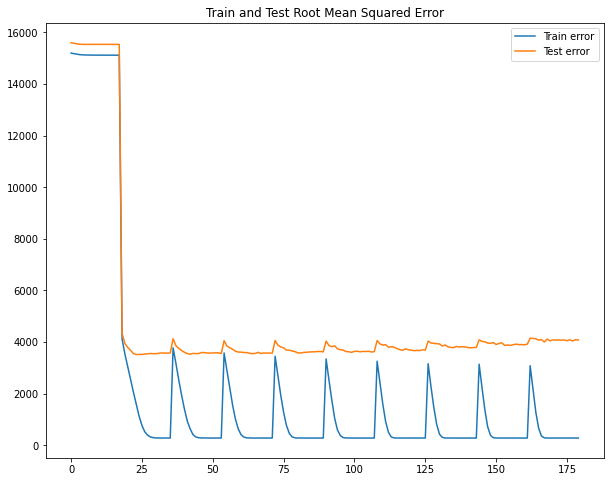

In [268]:
plt.figure(figsize=(10,8))
_=plt.plot(-cv_result['mean_train_score'],label='Train error')
_=plt.plot(cv_result['mean_test_score'],label="Test error")
_=plt.legend()
_=plt.title("Train and Test Root Mean Squared Error")

#### Let's see the test score of various combinations of  max_depth value and learning rate.

<Figure size 1080x576 with 0 Axes>

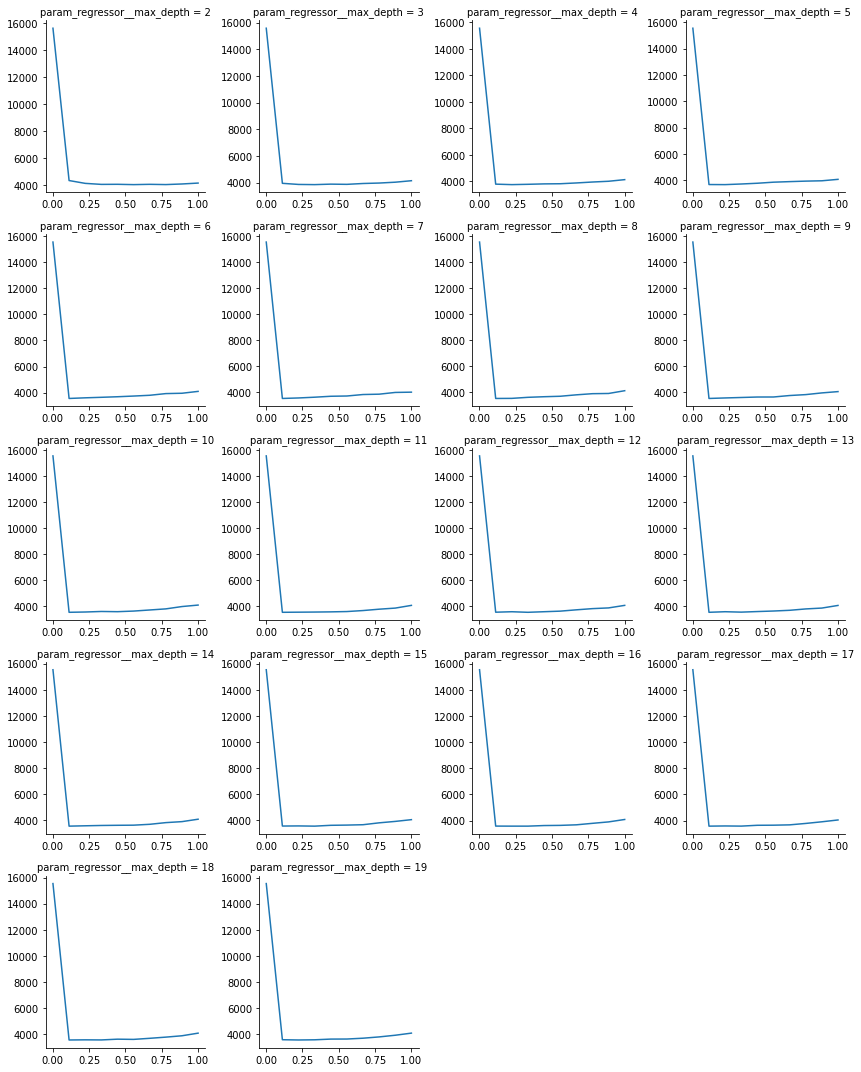

In [258]:
_=plt.figure(figsize=(15,8))
g = sns.FacetGrid(cv_result, col="param_regressor__max_depth",col_wrap=4,sharex=False, 
                  sharey=False)
g.map_dataframe(sns.lineplot, x="param_regressor__learning_rate",
                y='mean_test_score')